In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:/Users/devli/Downloads/Extended_Employee_Performance_and_Productivity_Data.csv")

In [3]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [5]:
data = df.iloc[:,8:18]

In [6]:
data

,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions
0,5,6750.0,33,32,22,2,0,14,66,0
1,5,7500.0,34,34,13,14,100,12,61,2
2,3,5850.0,37,27,6,3,50,10,1,0
3,2,4800.0,52,10,28,12,100,10,0,1
4,2,4800.0,38,11,29,13,100,15,9,1
...,...,...,...,...,...,...,...,...,...,...
99995,4,4900.0,55,46,5,3,75,16,48,2
99996,5,8250.0,39,35,7,0,0,10,77,1
99997,2,4800.0,31,13,6,5,0,5,87,1
99998,5,8250.0,35,43,10,1,75,2,31,1


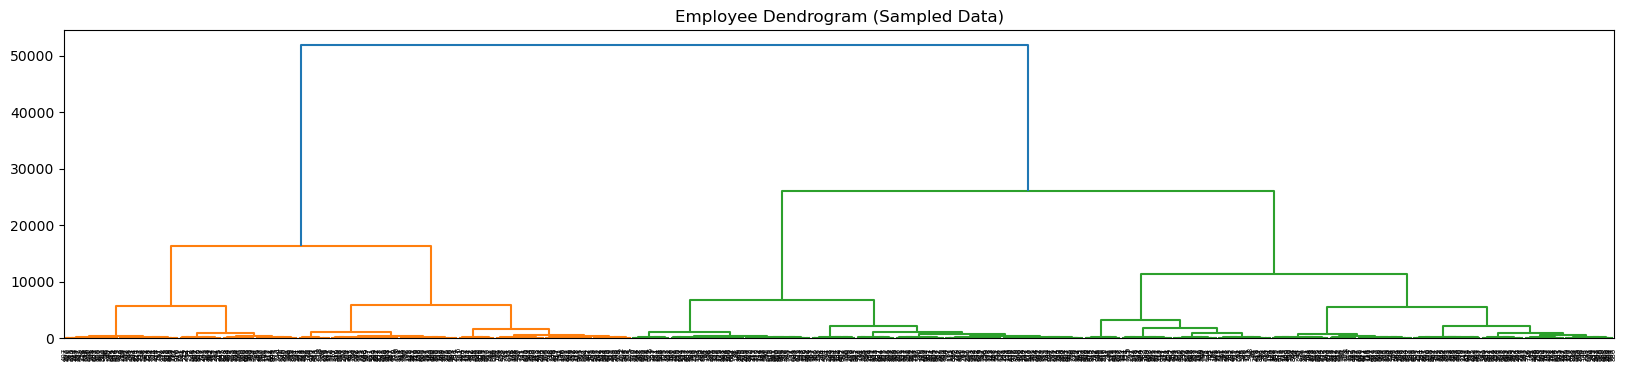

In [7]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Sample the data to reduce memory load (optional step)
sample_size = 1000  # adjust based on your system's memory capacity
data_sample = data.sample(n=sample_size, random_state=42)

# Plot dendrogram for the sampled data
plt.figure(figsize=(20, 4))
plt.title("Employee Dendrogram (Sampled Data)")
dend = shc.dendrogram(shc.linkage(data_sample, method='ward', metric='euclidean'))
plt.show()

# Alternatively, perform hierarchical clustering on the full dataset without dendrogram
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')




In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward') # ward = minimum variance

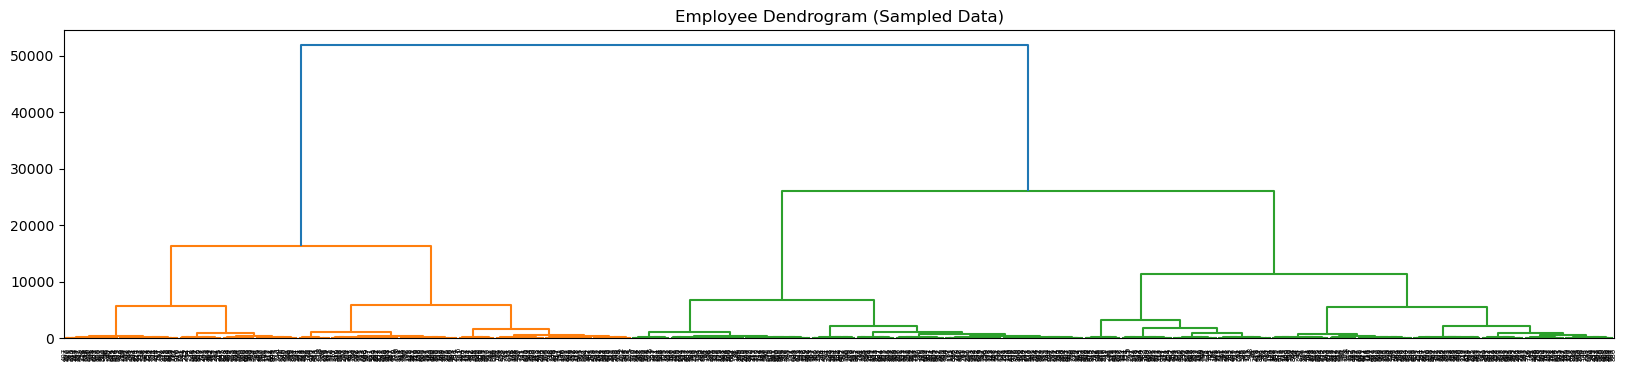

MemoryError encountered with AgglomerativeClustering. Switching to MiniBatchKMeans.


,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,cluster
0,5,6750.0,33,32,22,2,0,14,66,0,2
1,5,7500.0,34,34,13,14,100,12,61,2,4
2,3,5850.0,37,27,6,3,50,10,1,0,0
3,2,4800.0,52,10,28,12,100,10,0,1,3
4,2,4800.0,38,11,29,13,100,15,9,1,3


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

# Step 1: Sample the Data for Dendrogram Visualization (optional)
sample_size = 1000  # Adjust based on available memory
data_sample = data.sample(n=sample_size, random_state=42)

# Step 2: Plot Dendrogram for the Sampled Data
plt.figure(figsize=(20, 4))
plt.title("Employee Dendrogram (Sampled Data)")
dend = shc.dendrogram(shc.linkage(data_sample, method='ward', metric='euclidean'))
plt.show()

# Step 3: Dimensionality Reduction on Full Data using PCA
pca = PCA(n_components=10)  # Adjust components as needed
data_reduced = pca.fit_transform(data)

# Step 4: Clustering on Reduced Data using Agglomerative Clustering (if memory allows)
try:
    clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
    data['cluster'] = clustering.fit_predict(data_reduced)
except MemoryError:
    print("MemoryError encountered with AgglomerativeClustering. Switching to MiniBatchKMeans.")

    # Step 5: Alternative Clustering with MiniBatchKMeans for Large Data
    kmeans = MiniBatchKMeans(n_clusters=5, batch_size=100, random_state=42)
    data['cluster'] = kmeans.fit_predict(data_reduced)

# Display clustered DataFrame
data.head()


In [10]:
import seaborn as sns

<Axes: xlabel='Overtime_Hours', ylabel='Work_Hours_Per_Week'>

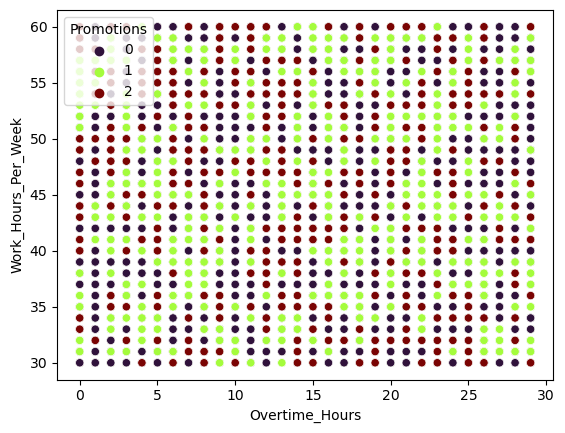

In [11]:
sns.scatterplot(x = 'Overtime_Hours',y = 'Work_Hours_Per_Week',hue = 'Promotions',palette="turbo",data=df)

In [12]:
df.Promotions = df.Promotions.replace([0,1,2],['Earning_Less_Spent_High','Earning_High_Spent_Less','Earning_High_Spent_High'])
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,Earning_Less_Spent_High,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,Earning_High_Spent_High,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,Earning_Less_Spent_High,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,Earning_High_Spent_Less,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,Earning_High_Spent_Less,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,Earning_High_Spent_High,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,Earning_High_Spent_Less,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,Earning_High_Spent_Less,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,Earning_High_Spent_Less,3.10,False


In [13]:
Final_Output = df.loc[:,["Employee_ID","Promotions"]]

def condition(x):
    if x== 'Earning_Less_Spent_High':
        return "Increase Salary "
    elif x== 'Earning_High_Spent_Less':
        return "Reduce Salary"
    else:
        return 'No salary'

# Applying the conditions
Final_Output['Suggestion'] = Final_Output['Promotions'].apply(condition)
Final_Output


,Employee_ID,Promotions,Suggestion
0,1,Earning_Less_Spent_High,Increase Salary
1,2,Earning_High_Spent_High,No salary
2,3,Earning_Less_Spent_High,Increase Salary
3,4,Earning_High_Spent_Less,Reduce Salary
4,5,Earning_High_Spent_Less,Reduce Salary
...,...,...,...
99995,99996,Earning_High_Spent_High,No salary
99996,99997,Earning_High_Spent_Less,Reduce Salary
99997,99998,Earning_High_Spent_Less,Reduce Salary
99998,99999,Earning_High_Spent_Less,Reduce Salary


# Finished